# Multiple Linear Regression: House Price Data Set
First, import all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Input the House Price Data Set.

In [2]:
x = np.array([[280, 3, 7, 8.9],
              [140, 2, 5, 2.3],
              [225, 2, 6, 7.0],
              [300, 4, 4, 9.2],
              [180, 2, 3, 3.4],
              [195, 2, 5, 5.6],
              [305, 4, 2, 9.4],
              [150, 3, 8, 3.8]])
print(x)

[[280.    3.    7.    8.9]
 [140.    2.    5.    2.3]
 [225.    2.    6.    7. ]
 [300.    4.    4.    9.2]
 [180.    2.    3.    3.4]
 [195.    2.    5.    5.6]
 [305.    4.    2.    9.4]
 [150.    3.    8.    3.8]]


Separate the regressors (X) from the targets (y). 

In [3]:
X = x[:,:-1]
y = x[:,-1].reshape(-1,1)
print(X)
print(y)

[[280.   3.   7.]
 [140.   2.   5.]
 [225.   2.   6.]
 [300.   4.   4.]
 [180.   2.   3.]
 [195.   2.   5.]
 [305.   4.   2.]
 [150.   3.   8.]]
[[8.9]
 [2.3]
 [7. ]
 [9.2]
 [3.4]
 [5.6]
 [9.4]
 [3.8]]


Normalize all data. (Note: The Standard Scaler uses the Population Standard Deviation formula) 

In [4]:
scalerX = StandardScaler()
X2 = scalerX.fit_transform(X)
scalerY = StandardScaler()
y2 = scalerY.fit_transform(y)
print(X2)
print(y2)

[[ 0.93757813  0.30151134  1.06904497]
 [-1.32067457 -0.90453403  0.        ]
 [ 0.05040743 -0.90453403  0.53452248]
 [ 1.26018566  1.50755672 -0.53452248]
 [-0.67545951 -0.90453403 -1.06904497]
 [-0.43350387 -0.90453403  0.        ]
 [ 1.34083754  1.50755672 -1.60356745]
 [-1.15937081  0.30151134  1.60356745]]
[[ 1.01742015]
 [-1.46960689]
 [ 0.30145782]
 [ 1.13046684]
 [-1.05510238]
 [-0.22609337]
 [ 1.20583129]
 [-0.90437347]]


Perform multiple linear regression.

In [5]:
model = LinearRegression().fit(X2, y2)
print("Coefficients: \n", model.intercept_, model.coef_)
r_sq = model.score(X2, y2)
print(f"R^2: {r_sq}")
ypred = model.predict(X2)
MSE = ((y - ypred)**2).sum()
print(f"MSE: {MSE}")
NMSE = MSE/((y2 - y2.mean())**2).sum()
print(f"NMSE: {NMSE}")

Coefficients: 
 [3.05665936e-16] [[ 1.07343058 -0.04043641  0.18214941]]
R^2: 0.9821547395895909
MSE: 330.0146192106626
NMSE: 41.251827401332825


Display the Predicted vs. Actual scatter plot.

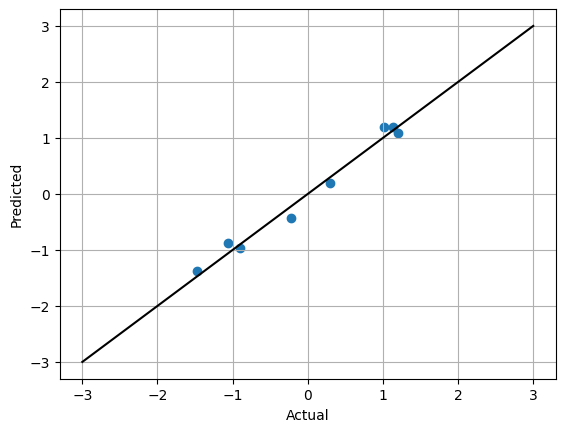

In [6]:
plt.scatter(y2,ypred)
plt.plot(np.array([-3, 3]),np.array([-3, 3]),color='k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()

Display the same result but with the original scale of y.

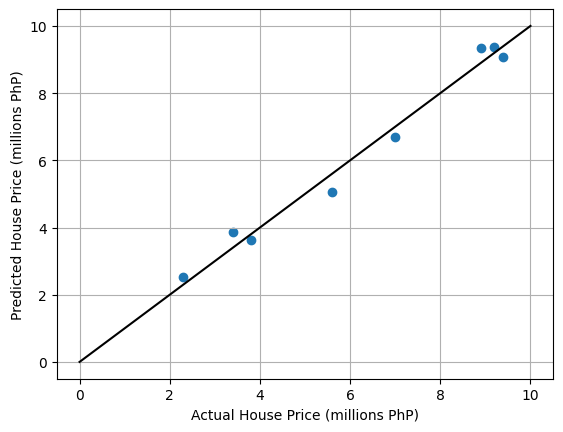

In [7]:
y = scalerY.inverse_transform(y2)
ypred2 = scalerY.inverse_transform(ypred)
plt.scatter(y,ypred2)
plt.plot(np.array([0, 10]),np.array([0, 10]),color='k')
plt.xlabel('Actual House Price (millions PhP)')
plt.ylabel('Predicted House Price (millions PhP)')
plt.grid()
plt.show()